<a href="https://colab.research.google.com/github/VedantSinghJ/Coursework_FDS/blob/main/Project_FDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd
  import numpy as np
  import re
  import seaborn as sns
  import matplotlib.pyplot as plt
  import nltk
  from nltk.corpus import stopwords
  from nltk.stem import PorterStemmer, WordNetLemmatizer
  from nltk.sentiment import SentimentIntensityAnalyzer
  from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
  from sklearn.model_selection import train_test_split
  from sklearn.svm import LinearSVC
  from sklearn.linear_model import LogisticRegression
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
  from wordcloud import WordCloud
  import string

  nltk.download('stopwords')
  nltk.download('wordnet')
  nltk.download('punkt_tab')
  nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df = pd.read_csv("/content/laptops_dataset_final_600.csv")
df.sample(5)

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
8856,ASUS Vivobook 15 Intel Core i3 12th Gen 1215U ...,4.3,"9,156",698,5,Excellent,This laptop is awesome.it ticks every box of i...
18257,Acer Aspire 3 Backlit Intel Core i3 12th Gen 1...,4.2,185,18,5,Awesome,Very good product according to price
10845,Acer Nitro V Intel Core i5 13th Gen 13420H - (...,4.3,256,21,4,Nice product,writing this after 1 week of use\nproduct is g...
3286,Acer Aspire Lite Intel Core i3 12th Gen 1215U ...,4.1,628,51,4,Pretty good,Very Good Laptop......
12532,realme Book (Slim) Intel Core i3 11th Gen 1115...,4.4,"15,729","2,171",4,Delightful,Got my unit today. Impressed with the design a...


In [ ]:
# Text Preprocessing
def preprocess_text(text, use_stemming=False):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    if use_stemming:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    else:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# lemmatization

df['cleaned_review'] = df['review'].astype(str).apply(lambda x: preprocess_text(x, use_stemming=False))

#Debug Review Sample
sample_review = df['review'].sample(1).values[0]
tokenized_words = preprocess_text(sample_review, use_stemming=False)

print("Original Review:")
print(sample_review)
print("\nTokenized Words:")
print(tokenized_words)

df[['review', 'cleaned_review']].head(10)

Original Review:
Wonderful device for study purpose and normal use and in budget.

Tokenized Words:
wonderful device study purpose normal use budget


,review,cleaned_review
0,"Loved it, it's my first MacBook that I earned ...",loved first macbook earned hardwork
1,Battery lasted longer than my first relationsh...,battery lasted longer first relationship day l...
2,Such a great deal.. very happy with the perfor...,great deal happy performance battery lifeorigi...
3,"Awesome build quality and very good display, b...",awesome build quality good display battery cam...
4,When i ordered and came to know about seller r...,ordered came know seller reviewi scared condit...
5,Super product,super product
6,Go for it..its awesome,go itits awesome
7,"Best , best and best 🫶🏻👑🍎",best best best
8,Its really very good and compact device.,really good compact device
9,"Superb built quality, Amazing performance and ...",superb built quality amazing performance displ...


                                          cleaned_review sentiment
15682                                   well performance  Positive
20984                                            awesome  Positive
12344                                       good product  Positive
18051   best laptop price range display quality improved  Positive
16717  great value money laptopbattery backup gooddec...  Positive
7975                                        good product  Positive
14996                                               good  Positive
7535               product goodits good thing less money  Positive
16826  got combination multiple deal like flipkart cr...  Positive
23987                   good delivery good product price  Positive


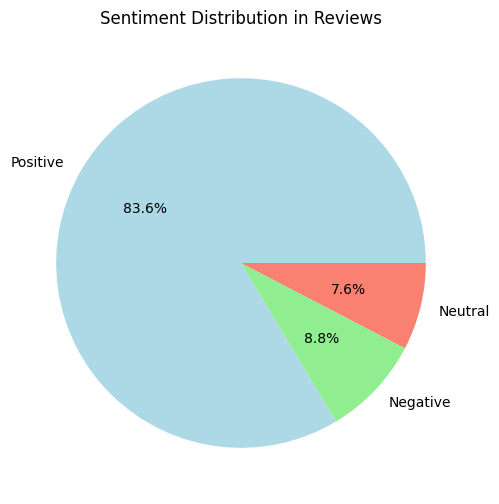

In [ ]:
# VADER Sentiment Analysis - labels
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']  #score
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['cleaned_review'].apply(get_sentiment) #senti
print(df[['cleaned_review','sentiment']].sample(10))

plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon'])
plt.title("Sentiment Distribution in Reviews")
plt.ylabel('')
plt.show()

In [ ]:
# Feature Extraction
vectorizer_tfidf = TfidfVectorizer(max_features=5000)
vectorizer_bow = CountVectorizer(max_features=5000)
X_tfidf = vectorizer_tfidf.fit_transform(df['cleaned_review'])
X_bow = vectorizer_bow.fit_transform(df['cleaned_review'])

print("TF-IDF Matrix shape:", X_tfidf.shape)
print("BoW Matrix shape:", X_bow.shape)

# output sample
print("Sample TF-IDF vocabulary:", vectorizer_tfidf.get_feature_names_out()[:5])

# compare samples
sample_idx = np.random.randint(0, X_tfidf.shape[0])
print("\nRandom Review (index {}):".format(sample_idx))
print(df['cleaned_review'].iloc[sample_idx])

tfidf_vector = X_tfidf[sample_idx].toarray()[0]
bow_vector = X_bow[sample_idx].toarray()[0]

# feature names
tfidf_features = vectorizer_tfidf.get_feature_names_out()
bow_features = vectorizer_bow.get_feature_names_out()

# non-zero tfidf
print("\nTF-IDF representation (word: weight):")
for i in np.where(tfidf_vector > 0)[0]:
    print(f"{tfidf_features[i]}: {tfidf_vector[i]:.3f}")

# non-zero bow
print("\nBoW representation (word: count):")
for i in np.where(bow_vector > 0)[0]:
    print(f"{bow_features[i]}: {bow_vector[i]}")


TF-IDF Matrix shape: (24113, 5000)
BoW Matrix shape: (24113, 5000)
Sample TF-IDF vocabulary: ['aa' 'aaa' 'aahe' 'aal' 'abhimanyu']

Random Review (index 2657):
truly value money sleek cool design good battery display good cool per price microsoft office google play supported issue editing word document downloaded doc complex need upload onedrive edit microsoft word good sound

TF-IDF representation (word: weight):
battery: 0.070
complex: 0.240
cool: 0.342
design: 0.104
display: 0.080
doc: 0.224
document: 0.203
downloaded: 0.236
edit: 0.202
editing: 0.147
good: 0.148
google: 0.194
issue: 0.106
microsoft: 0.342
money: 0.084
need: 0.129
office: 0.116
per: 0.161
play: 0.142
price: 0.083
sleek: 0.155
sound: 0.108
supported: 0.210
truly: 0.194
upload: 0.254
value: 0.087
word: 0.356

BoW representation (word: count):
battery: 1
complex: 1
cool: 2
design: 1
display: 1
doc: 1
document: 1
downloaded: 1
edit: 1
editing: 1
good: 3
google: 1
issue: 1
microsoft: 2
money: 1
need: 1
office: 1
per: 1
p

In [ ]:
y = df['sentiment']  #Target var

# split data(TF-IDF)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
# split data(BoW)
X_train_bow, X_test_bow, _, _ = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# Models to train on
models = {
    "SVM": LinearSVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB()
}

results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    conf_matrices[name] = confusion_matrix(y_test, y_pred, labels=["Negative", "Neutral", "Positive"])
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

SVM Accuracy: 0.98
              precision    recall  f1-score   support

    Negative       0.94      0.93      0.94       414
     Neutral       0.94      0.92      0.93       352
    Positive       0.99      0.99      0.99      4057

    accuracy                           0.98      4823
   macro avg       0.96      0.95      0.95      4823
weighted avg       0.98      0.98      0.98      4823

Logistic Regression Accuracy: 0.97
              precision    recall  f1-score   support

    Negative       0.94      0.83      0.88       414
     Neutral       0.93      0.80      0.86       352
    Positive       0.97      0.99      0.98      4057

    accuracy                           0.97      4823
   macro avg       0.95      0.88      0.91      4823
weighted avg       0.97      0.97      0.96      4823

Naive Bayes Accuracy: 0.88
              precision    recall  f1-score   support

    Negative       0.92      0.38      0.54       414
     Neutral       1.00      0.12      0.21     

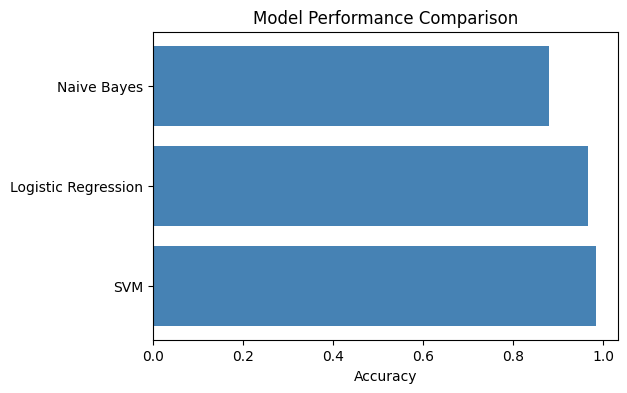

In [ ]:
plt.figure(figsize=(6,4))
plt.barh(list(results.keys()), list(results.values()), color='steelblue')
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


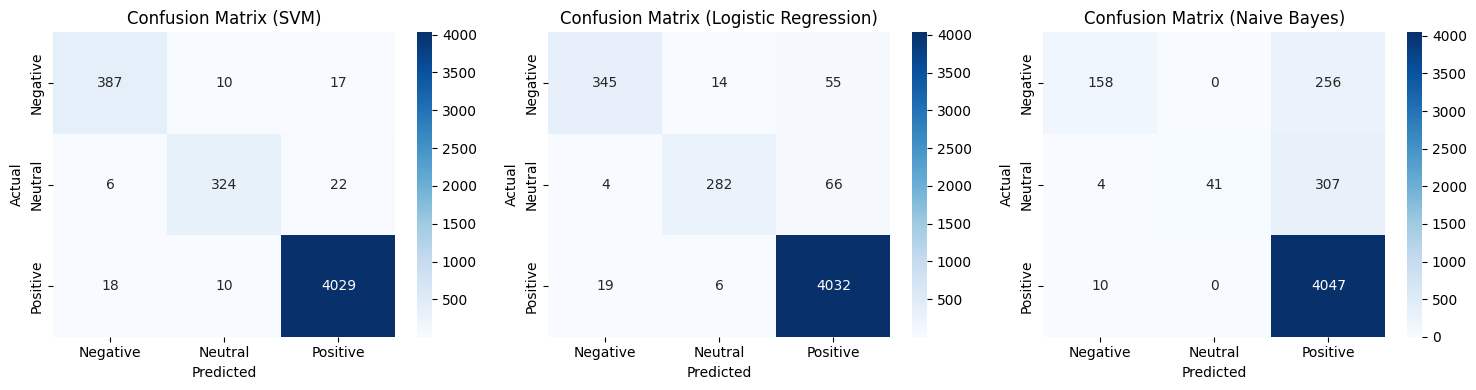

In [ ]:
models = list(conf_matrices.keys())
n_models = len(models)
fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 4))

for ax, name in zip(axes, models):
    sns.heatmap(conf_matrices[name],
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'],
                ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix ({name})")

plt.tight_layout()
plt.show()


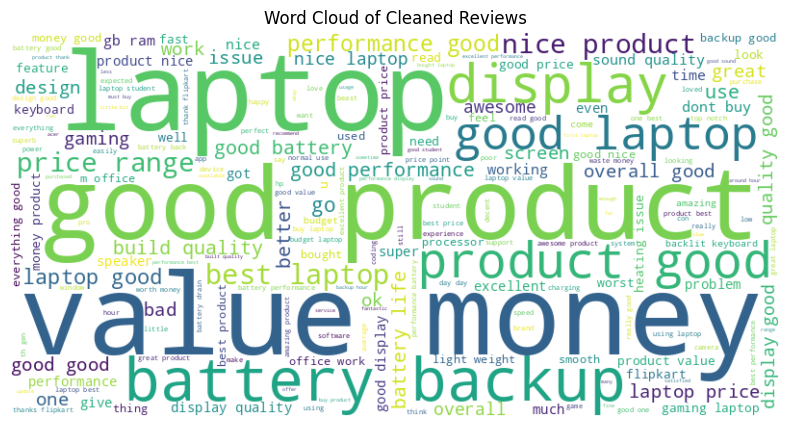

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_review']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cleaned Reviews")
plt.show()


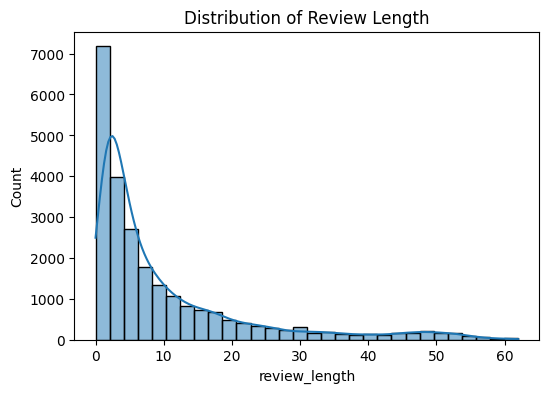

In [ ]:
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6,4))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title("Distribution of Review Length")
plt.show()

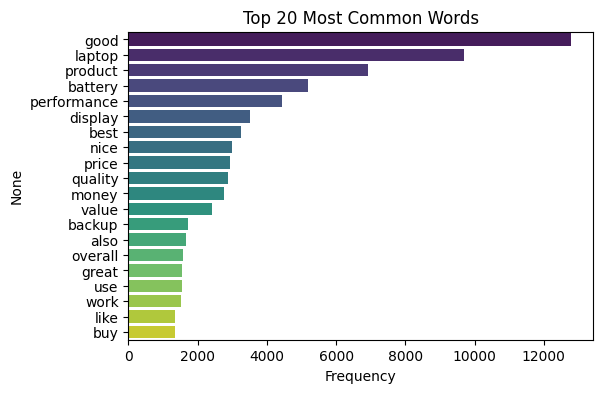

In [ ]:
all_words = ' '.join(df['cleaned_review']).split()
word_freq = pd.Series(all_words).value_counts().head(20)
plt.figure(figsize=(6,4))
sns.barplot(
    x=word_freq.values,
    y=word_freq.index,
    hue=word_freq.index,
    palette='viridis',
    legend=False
)
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.show()

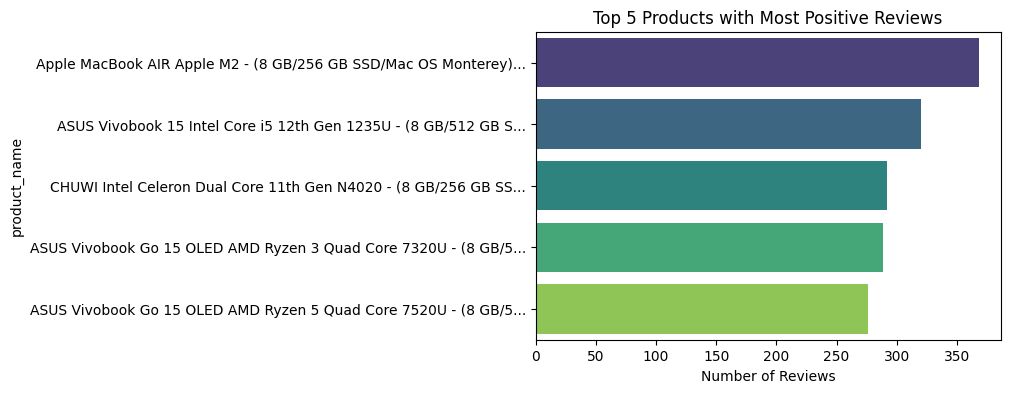

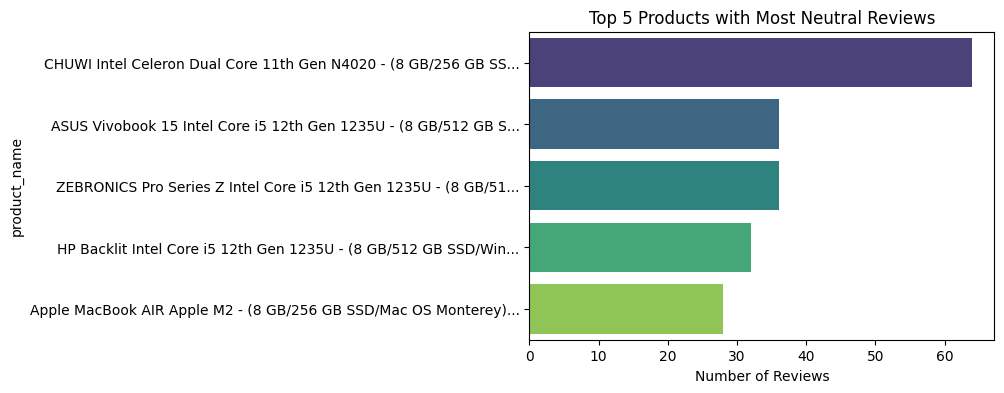

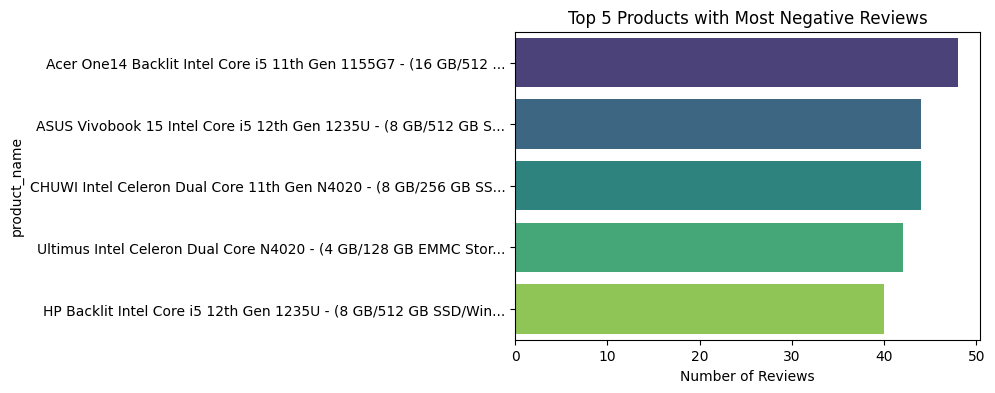

In [ ]:
# Top 5 Products per Category with Most Positive, Neutral, Negative Reviews
sentiment_counts = df.groupby(['product_name', 'sentiment']).size().unstack().fillna(0)
for sentiment in ['Positive', 'Neutral', 'Negative']:
    top_products = sentiment_counts[sentiment].nlargest(5)
    plt.figure(figsize=(6,4))
    sns.barplot(
        x=top_products.values,
        y=top_products.index,
        hue=top_products.index,
        palette='viridis',
        legend=False
    )
    plt.title(f"Top 5 Products with Most {sentiment} Reviews")
    plt.xlabel("Number of Reviews")
    plt.show()

In [ ]:
df[['product_name', 'overall_rating', 'no_ratings', 'no_reviews', 'cleaned_review', 'sentiment', 'review_length']].to_csv("flipkart_reviews_powerbi.csv", index=False)
print("Dataset saved")

Dataset saved
